In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.shape

(85103, 39)

# Preporcessing

## Quick Cleaning

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

## Renaming Columns

In [7]:
df.columns


Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [8]:
df = df.rename(columns={'Supported languages': 'language', 'Release date': 'Release_Date',
                        'Estimated owners': 'Estimated_Owners',
                        'Peak CCU': 'Peak_CCU','Required age': 'Req_Age',
                        'About the game': 'Overview',
                         'Score rank': 'Score_Rank',
                        'Metacritic score': 'Metacritic_Score',
                        'User score': 'User_Score',
                        'Average playtime forever':'Average_playtime_forever',
                        'Average playtime two weeks':'Average_playtime_2weeks',
                        'Median playtime forever':'Median_playtime_forever', 
                        'Median playtime two weeks': 'Median_playtime_forever',
                        })

In [9]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [10]:
df=df.iloc[:20000]

In [11]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Switching User's choice to first row

In [12]:
index1 = df.loc[df['Name'] == 'Need For Speed: Hot Pursuit'].index[0]

In [13]:
print(index1)

9320


In [14]:
row_to_move = df.iloc[index1]  # save the row as a Series
df= df.drop(index1, axis=0)  # remove the row from the DataFrame
df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


C:\Users\Aditya\AppData\Local\Temp\ipykernel_37080\329920085.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


In [15]:
df=df.reset_index(drop=True)

In [16]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,47870,Need For Speed: Hot Pursuit,"Dec 14, 2010",2000000 - 5000000,71,0,0.0,0,Need for Speed Hot Pursuit launches you into a...,"['Czech', 'English', 'French', 'German', 'Hung...",...,0,240,0,Criterion Games,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Stea...",Racing,"Racing,Combat Racing,Sports,Driving,PvP,Automo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Put all the needed words in the column called Tags

In [17]:
df['Categories'] = df['Categories'].str.replace(" ", "")

In [18]:
df['Categories'] = df['Categories'].str.replace(",", " ")

In [19]:
df['Tags'] = df['Tags'].str.replace(" ", "")

In [20]:
df['Tags']=df['Tags'].str.replace(",", " ")

In [21]:
df['Genres'] = df['Genres'].str.replace(" ", "")

In [22]:
df['Genres'] = df['Genres'].str.replace(",", " ")

In [23]:
df['Tags']=df['Overview']+df['Categories']+df['Genres']+df['Tags']

In [24]:
df['Tags'][0]

"Need for Speed Hot Pursuit launches you into a new open-world landscape behind the wheel of the world's fastest and most beautiful cars. From Criterion, the award-winning studio behind the Burnout series, Hot Pursuit will redefine racing games for a whole new generation. You'll experience stunning speeds, takedowns, and getaways as you battle your friends in the most connected Need for Speed game ever. Through Need for Speed Autolog and its innovative approach to connected social competition, your Hot Pursuit experience will extend beyond the console onto the web, constantly moving your gameplay in new and unique directions. Loaded with action, this game will challenge you to become Seacrest County's top cop or most wanted racer. For the first time ever in a Need for Speed game, you'll be able to play a full career on either side of the law. Whether you're a lead-foot speeder or a cop with a mean streak, make sure your aviators are spotless and your driving record is anything but. Key

Extracted only the year from the release date and change it to int type

## Parsing Date

In [25]:
df['Release_Date'] = df['Release_Date'].str.rsplit(',').str[-1] 

In [26]:
df['Release_Date'] = df['Release_Date'].str.replace(" ", "")

In [27]:
df= df[df['Release_Date'].str.len() <=4]

In [28]:
df['Release_Date'] = df['Release_Date'].astype('int')

Below is your needed dataframe, feel free to add any columns that you feel will be useful.
-All the columns are integers or floats excpet the "Tags" of course.
- You can split and merge the column as you wish to build your recommendation system

In [29]:
cols = ['Price', 'User_Score', 'Positive', 'Negative', 'Score_Rank', 'Achievements',
        'Recommendations', 'Tags', 'Release_Date', 'Name']


In [30]:
data=df[cols]

In [31]:
data = data.reindex(columns=['Price','User_Score','Positive','Negative','Achievements',
      'Recommendations','Tags','Release_Date','Name'])

In [32]:
data.shape

(19967, 9)

In [33]:
data.head()

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name
0,0.0,0,16047,3455,0,17081,Need for Speed Hot Pursuit launches you into a...,2010,Need For Speed: Hot Pursuit
1,19.99,0,6,11,30,0,Galactic Bowling is an exaggerated and stylize...,2008,Galactic Bowling
2,0.99,0,53,5,12,0,THE LAW!! Looks to be a showdown atop a train....,2017,Train Bandit
3,4.99,0,0,0,0,0,NaN,2021,Jolt Project
4,5.99,0,3,0,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,Henosis™


## Transform to int

In [34]:
data.iloc[:, :6] = data.iloc[:, :6].astype(int)

## Scale

In [35]:
scaler = MinMaxScaler()

In [36]:
data_first_6 = data.iloc[:, :6]
data_scaled_first_6 = pd.DataFrame(scaler.fit_transform(data_first_6), columns=data_first_6.columns)
data = pd.concat([data_scaled_first_6, data.iloc[:, 6:]], axis=1)

# Content Based RecSys

In [37]:
data = data.fillna('')
# Remove consecutive spaces resulting from NaN values
data['Tags'] = df['Tags'].str.replace('\s+', ' ')


C:\Users\Aditya\AppData\Local\Temp\ipykernel_37080\1840813370.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tags'] = df['Tags'].str.replace('\s+', ' ')


In [38]:
contains_nan = data['Tags'].str.contains('NaN')

# Count the number of cells containing 'NaN'
num_nan = contains_nan.sum()
print(num_nan)

2


In [39]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(max_features=5000,stop_words='english')


In [40]:
vector=cv.fit_transform(data['Tags'].fillna('')).toarray()

In [41]:
similarity=cosine_similarity(vector)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [42]:
game_list=sorted(list(enumerate(similarity[0])),reverse=True, key=lambda x:x[1])[1:11]

In [43]:
print(game_list)

[(11947, 0.3740364628637751), (1574, 0.34051394165786086), (16743, 0.33616063870446883), (3967, 0.33450324496540335), (19657, 0.33293279852146107), (2038, 0.3226259529819746), (9652, 0.32002697883835496), (19263, 0.31864620794406795), (12600, 0.3159940365288875), (9037, 0.31535065032891485)]


## Put list into dataframe

In [44]:
game_ids=[]

In [45]:
def Get_IDs(game_ids,hlist): 
  for i in hlist:
   game_ids.append(i[0])

In [46]:
Get_IDs(game_ids,game_list)

In [47]:
game_ids

[11947, 1574, 16743, 3967, 19657, 2038, 9652, 19263, 12600, 9037]

In [48]:
list_of_games=pd.DataFrame(index=range(10), columns=range(9))

In [49]:
index=-1
for i in game_ids:
  index=index+1
  list_of_games.iloc[index]=data.iloc[i]

In [50]:
list_of_games = list_of_games.rename(columns={0:'Price', 1: 'User_Score',
                                              2:'Positive',
                                              3:'Negative',
                                              4:'Achievements',
                                              5:'Recommendations',
                                              6:'Tags',
                                              7:'Release_Date',
                                              8:'Name'})

## Ordering

In [51]:
list_of_games['XFactor']=list_of_games['Positive']+list_of_games['User_Score']+list_of_games['Recommendations']

In [52]:
price_ordered=list_of_games.sort_values(by=['Price'],ascending=True)

In [53]:
Release_Ordered=list_of_games.sort_values(by=['Release_Date'],ascending=False)

In [54]:
XFactor_Ordered=list_of_games.sort_values(by=['XFactor'],ascending=False)

In [55]:
list_of_games['Price']=(list_of_games['Price']+8.22)

In [56]:
def ListGames(data):
  for index, row in data.iterrows():
    print(row['Name'])

In [57]:
ListGames(list_of_games)

Forza Horizon 5
Need for Speed™
DIRT 5
Extreme Skiing VR
Night Racer
Need for Speed™ Payback
Hotshot Racing
Spellgear
Need for Speed™ Heat
Hover


In [58]:
ListGames(price_ordered)

Forza Horizon 5
DIRT 5
Extreme Skiing VR
Need for Speed™
Need for Speed™ Payback
Hotshot Racing
Spellgear
Night Racer
Need for Speed™ Heat
Hover


In [59]:
ListGames(Release_Ordered)

Night Racer
Forza Horizon 5
Need for Speed™
DIRT 5
Need for Speed™ Payback
Hotshot Racing
Need for Speed™ Heat
Spellgear
Hover
Extreme Skiing VR


In [60]:
ListGames(XFactor_Ordered)

Hover
Night Racer
Spellgear
Forza Horizon 5
DIRT 5
Extreme Skiing VR
Need for Speed™ Payback
Hotshot Racing
Need for Speed™ Heat
Need for Speed™


# User-History Based Recsys

## PCA on data matrix

In [61]:
pca = PCA(n_components=None)

In [62]:
dfx_pca = pca.fit(vector)

In [63]:
r=[]
for i in range(len(dfx_pca.explained_variance_ratio_)):
  r.append(i+1)

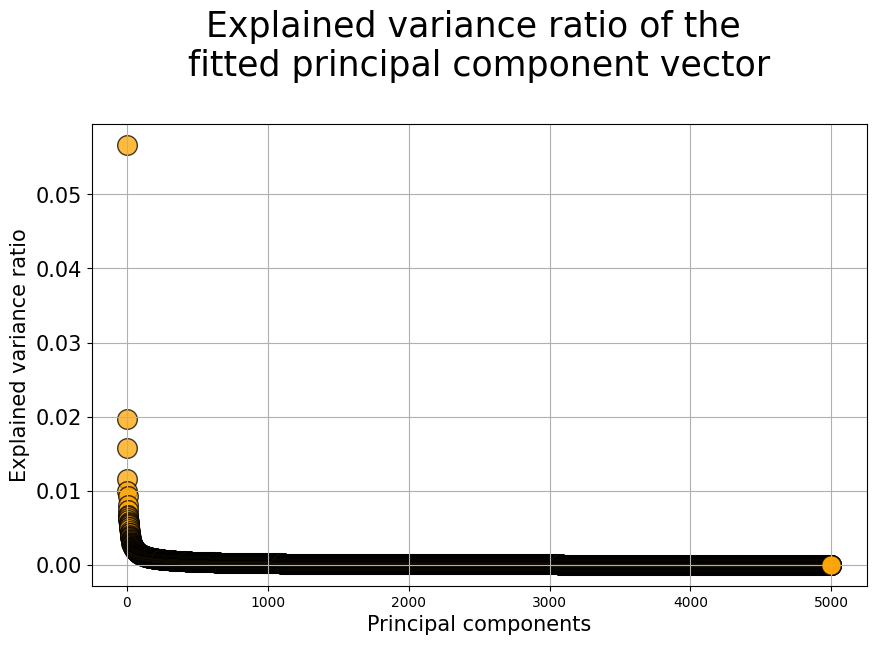

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=r,
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
#plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [65]:
total=0
for i in range(len(dfx_pca.explained_variance_ratio_)):
    total=total+dfx_pca.explained_variance_ratio_[i]
    if total>0.8:
     n=i
     print(n)
     break

1053


In [66]:
pca = PCA(n_components=n)

In [67]:
finaldf = pca.fit(vector)

In [68]:
finaldf=pca.transform(vector)

In [69]:
finaldf=pd.DataFrame(finaldf)

In [70]:
finaldf

,0,1,2,3,4,5,6,7,8,9,...,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052
0,6.009344,-4.105021,-0.158298,0.112397,-3.380197,-0.262395,1.829157,-1.679241,-2.111836,0.605949,...,-0.541853,-0.016386,-0.496421,0.029768,-0.008603,0.163754,-0.188795,0.394773,-0.161377,-0.149056
1,3.857342,-1.164547,-4.204653,-1.304215,-1.401527,0.056480,-0.233718,2.344752,1.066224,0.072569,...,-0.100180,0.210655,0.302996,-0.108146,-0.087933,-0.070669,0.099805,0.187367,0.086328,0.040059
2,-0.729502,0.687477,-0.641385,0.032785,0.236546,0.826429,-1.006304,-0.444173,-0.396475,-0.114984,...,-0.169121,-0.192491,0.086150,0.185080,0.051237,-0.047492,0.048603,-0.021308,0.247366,0.032664
3,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,-0.005458,0.004847,-0.001243,0.000918,0.004861,-0.004590,-0.004741,0.002375,0.001710,-0.000981
4,-0.772277,-1.427576,0.550445,-1.955713,-0.572065,0.527786,1.089030,1.360639,-1.549569,-2.682784,...,-0.115732,-0.067592,0.012641,0.177056,0.079585,0.102520,0.057136,0.034569,0.113968,0.129216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.738281,-0.762746,-4.684094,-0.318962,0.471780,0.268400,-0.339242,5.473336,0.357536,-3.425327,...,0.049221,-0.363548,-0.147096,-0.035946,0.058999,-0.236781,-0.058287,-0.414197,-0.114752,0.150551
19996,2.267348,-1.473643,0.608813,1.277134,0.544269,3.313697,-1.432982,1.577801,-1.985723,0.152232,...,-0.176098,0.429336,-0.302029,-0.307084,0.255730,-0.165376,-0.143548,0.273094,-0.248838,-0.122704
19997,-1.390138,-0.144814,0.248404,-0.490436,0.429808,0.122241,-0.238757,-0.512848,0.180543,0.139951,...,-0.116139,-0.111286,0.104585,-0.277528,0.064150,-0.005843,0.054929,0.011267,0.130359,-0.035060
19998,2.502503,2.341593,0.699883,-0.758021,1.625738,-1.399597,-2.092486,-0.296091,-1.430272,-0.274912,...,-0.149090,0.035911,0.083615,-0.091403,-0.046027,0.004222,-0.057656,0.023941,0.171986,-0.137513


## Create A User History

In [71]:
user_history=finaldf.sample(n=20)

## Get Centroid of the user history matrix

In [72]:
centroid=finaldf.mean()

## Cosine Similarity with Centroid

In [73]:
finaldf.loc[-1] = centroid
finaldf.index = finaldf.index + 1
finaldf = finaldf.sort_index()

In [74]:
new_vector=finaldf.to_numpy()

In [75]:
#similarity_centroid=cosine_similarity(new_vector)

In [76]:
# Define the cosine similarity function
def cosine_similarity(vec1, vec2):
  """
  Calculates the cosine similarity between two vectors.

  Args:
      vec1 (list): The first vector.
      vec2 (list): The second vector.

  Returns:
      float: The cosine similarity between the two vectors.
  """

  if len(vec1) != len(vec2):
    raise ValueError("Vectors must have the same length.")

  dot_product = sum(a * b for a, b in zip(vec1, vec2))
  magnitude1 = sum(x**2 for x in vec1)**0.5
  magnitude2 = sum(x**2 for x in vec2)**0.5

  if magnitude1 == 0 or magnitude2 == 0:
    # Handle cases where one or both vectors have zero magnitude
    return 0

  return dot_product / (magnitude1 * magnitude2)

# Calculate cosine similarity between centroid and each vector
similarity_centroid = []
for i in range(1, len(new_vector)):
  similarity_centroid.append(cosine_similarity(new_vector[0], new_vector[i]))

In [77]:
# Sort based on similarity (assuming similarity_centroid is a list)
game_list_from_centroid = sorted(enumerate(similarity_centroid), reverse=True, key=lambda x: x[1])[1:11]

In [78]:
print(game_list_from_centroid)

[(1608, 0.4369750281024469), (19883, 0.42390151655258657), (4251, 0.4184228907243838), (2941, 0.4118797484554258), (2767, 0.40658580266221117), (18958, 0.40596531800905195), (10805, 0.398899053161665), (9339, 0.398522065549008), (3623, 0.39744041131567825), (7066, 0.3969621279425408)]


In [79]:
def Get_Name(hlist,frame): 
  for i in hlist:
   print(frame.iloc[i[0]+1].Name)

In [80]:
Get_Name(game_list_from_centroid,data)

HardCop 2
The Empty Inn
RTS Commander: Smash the Rebels
Ancient lands: the Tsar awakening
Tank Universal
Airborne: Trials
The Spook Inspectors
Kontrol Flow
C.H.A.S.E.D.
The Cleaner


# ConvexHull -To check if this game could fit the user

In [81]:
from scipy.spatial import ConvexHull
import scipy.spatial
from scipy.spatial import Delaunay

In [82]:
pca_convex=PCA(n_components=10)


In [83]:
c_df= pca_convex.fit(vector)

In [84]:
c_df=pca_convex.transform(vector)

In [85]:
c_df=pd.DataFrame(c_df)

In [86]:
user_history_convex=c_df.sample(n=20)

In [87]:
hull = ConvexHull(user_history_convex)

In [88]:
def in_hull(p, hull):
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

In [89]:
compatability = pd.DataFrame(index=range(50), columns=['Name','Compatability'])

In [90]:
for i in range(0,50):
  if(in_hull(c_df.iloc[i],user_history_convex)==0):
   compatability.loc[i,'Name']=data.iloc[i].Name
   compatability.loc[i,'Compatability']='Not Compatible'
  else:
    compatability.loc[i,'Name']=data.iloc[i].Name
    compatability.loc[i,'Compatability']='Compatible'
  

In [91]:
compatability

,Name,Compatability
0,Need For Speed: Hot Pursuit,Not Compatible
1,Galactic Bowling,Not Compatible
2,Train Bandit,Not Compatible
3,Jolt Project,Compatible
4,Henosis™,Not Compatible
5,Two Weeks in Painland,Not Compatible
6,Wartune Reborn,Not Compatible
7,TD Worlds,Not Compatible
8,Legend of Rome - The Wrath of Mars,Compatible
9,MazM: Jekyll and Hyde,Not Compatible
